# Graphical Models: Similarity Distribution Experimentation

In [113]:
# Import necessary libraries
from sde import *
from sklearn.datasets import make_blobs

## Experiment

### make directed graph

In [114]:
g = makeDirectedGraph(5, 7)
edges = nx.edges(g)

print(edges)

[(2, 4), (2, 0), (3, 4)]


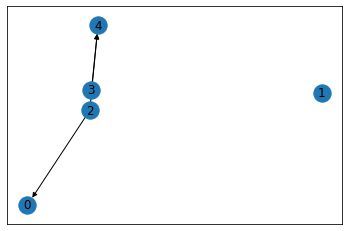

In [115]:
nx.draw_networkx(g)

In [116]:
edge_weights = nx.get_edge_attributes(g, 'weight')
print(edge_weights)

{(2, 4): 0.7185083937410041, (2, 0): 0.38880051316190123, (3, 4): 0.7126899046922631}


In [117]:
# conditional prob P(A|B) = (likelihood*pior)/marginal prob
# likelihood P(B|A). Likelihood = (conditional prob * marginal prob)/pior. Or, P(B|A) = P(A|B)P(B)/P(A)
# prior P(A)
# marginal prob P(B)

def reverseEdgeWeight(conditional_prob):
    '''Accepts a conditional probability value P(A|B), returns P(B|A) and a pair of values for P(A) and P(B) that
        would be consistent with the given conditional probability and its reversed conditional probability.)'''
    pior = random.uniform(0,1)
    marginal_prob = random.uniform(0,1)
    
    likelihood = (conditional_prob*marginal_prob)/pior
    known_conditional_prob = (prior*likelihood)/marginal_prob
    
    while (known_conditional_prob == conditional_prob):
        reverseEdgeWeight(conditional_prob)
    
    return likelihood
        

{(2, 4): 0.4095601096707423, (2, 0): 0.5573908214165543, (3, 4): 0.2689518444730685}
{(0, 2): 0.5573908214165543, (4, 3): 0.2689518444730685, (4, 2): 0.4095601096707423}


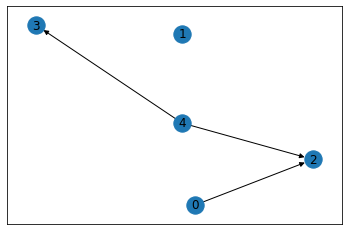

In [118]:
def reverseWeightedDG(dg):
    rdg = nx.reverse_view(dg)
    
    for e in dg.edges():
        rdg[e[::-1][0]][e[::-1][1]]['weight'] = reverseEdgeWeight(dg[e[0]][e[1]]['weight'])
        
    print(nx.get_edge_attributes(dg, 'weight'))
    print(nx.get_edge_attributes(rdg,'weight'))
    return rdg



g_reversed = reverseWeightedDG(g)
nx.draw_networkx(g_reversed)

In [119]:
print('Reversed graph edge data:', nx.get_edge_attributes(g_reversed, 'weight'))

Reversed graph edge data: {(0, 2): 0.5573908214165543, (4, 3): 0.2689518444730685, (4, 2): 0.4095601096707423}


In [120]:
print('Original graph edge data:', nx.get_edge_attributes(g, 'weight'))

Original graph edge data: {(2, 4): 0.4095601096707423, (2, 0): 0.5573908214165543, (3, 4): 0.2689518444730685}


# Similarity data

Compare the similarity measures of a weighted graph and its reverse graph

methods adapted from Nico's getSimilarityData function

In [121]:
nodes = list(g.nodes)
node_pairs = list(it.combinations(nodes, 2))

nodes_reversed = list(g_reversed.nodes)
node_pairs_reversed = list(it.combinations(nodes_reversed, 2))

# Similarity method: Jaccard Index

In [122]:
jindex_original = []
for pair in node_pairs:
    jindex_original.append(calculate_similarity(g, pair[0], pair[1])["method 1"])
    jindex_original.append(calculate_similarity(g, pair[1], pair[0])["method 1"])
    
print(jindex_original)

[0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.278144253060125, 0.278144253060125, 0.0, 0.0, 0.0, 0.0]


In [123]:
jindex_reversed = []
for pair in node_pairs_reversed:
    jindex_reversed.append(calculate_similarity(g_reversed, pair[0], pair[1])["method 1"])
    jindex_reversed.append(calculate_similarity(g_reversed, pair[1], pair[0])["method 1"])
    
print(jindex_reversed)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4956298719367451, 0.4956298719367451, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]


# Similarity method: Edit distance

based on node children

In [124]:
ed_immediate_sim = []
for pair in node_pairs:
    ed_immediate_sim.append(get_immediate_similarity(g, pair[0], pair[1]))
    ed_immediate_sim.append(get_immediate_similarity(g, pair[1], pair[0]))
    
print(ed_immediate_sim)

[0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0.5703041325988369, 0.14060826519767378, 1.0, 0, 1.0, 0]


In [125]:
ed_immediate_sim_reversed = []
for pair in node_pairs_reversed:
    ed_immediate_sim_reversed.append(get_immediate_similarity(g_reversed, pair[0], pair[1]))
    ed_immediate_sim_reversed.append(get_immediate_similarity(g_reversed, pair[1], pair[0]))
    
print(ed_immediate_sim_reversed)

[1.0, 0, 1.0, 0, 1.0, 0, 0.14783071174581197, 0.573915355872906, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0]


based on node descendants

In [126]:
ed_full_sim = []
for pair in node_pairs:
    ed_full_sim.append(get_full_similarity(g, pair[0], pair[1]))
    ed_full_sim.append(get_full_similarity(g, pair[1], pair[0]))
    
print(ed_full_sim)

[0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0.5703041325988369, 0.14060826519767378, 1.0, 0, 1.0, 0]


In [127]:
ed_full_sim_reversed = []
for pair in node_pairs_reversed:
    ed_full_sim_reversed.append(get_full_similarity(g_reversed, pair[0], pair[1]))
    ed_full_sim_reversed.append(get_full_similarity(g_reversed, pair[1], pair[0]))
    
print(ed_full_sim_reversed)

[1.0, 0, 1.0, 0, 1.0, 0, 0.14783071174581197, 0.573915355872906, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0]


# Similarity method: Edit-distance (Networkx)

In [128]:
for v in nx.optimize_graph_edit_distance(g, g_reversed):
    minv = v

minv

0.0

In [129]:
nx.optimize_edit_paths(g, g_reversed)

<generator object optimize_edit_paths at 0x000001BEB7075248>

In [130]:
nx.graph_edit_distance(g, g_reversed)

0.0